# Lab 3 Data Visualisation on Python with Seaborn

## 1. Import data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dtypes = {'OrderId':'int', 
          'OrderDate':'str', 
          'OrderSum':'float', 
          'ClientId':'int',
          'ClientSex':'category',
          'ClientAge':'int',
          }
df = pd.read_csv('lab3.csv', dtype=dtypes, parse_dates=['OrderDate'])

## 2. Plot a line graph of all orders per day, as a function of the date (year - month - day). Here and below use the seaborn library to draw the graphs. Use matplotlib library as needed to set the size of the graph. 
2.1. Rotate captions on the x-axis (dates) to a 45 degree angle.
2.2 Add a name to the chart

In [2]:
df2 = df[["OrderDate", "OrderSum"]].groupby('OrderDate').sum().reset_index()
df2['OrderDate'] = df2['OrderDate'].dt.strftime('%Y-%m-%d')
df2['RollingMean7'] = df2['OrderSum'].rolling(7, min_periods=1).mean()
df2['RollingMean30'] = df2['OrderSum'].rolling(30, min_periods=1).mean()

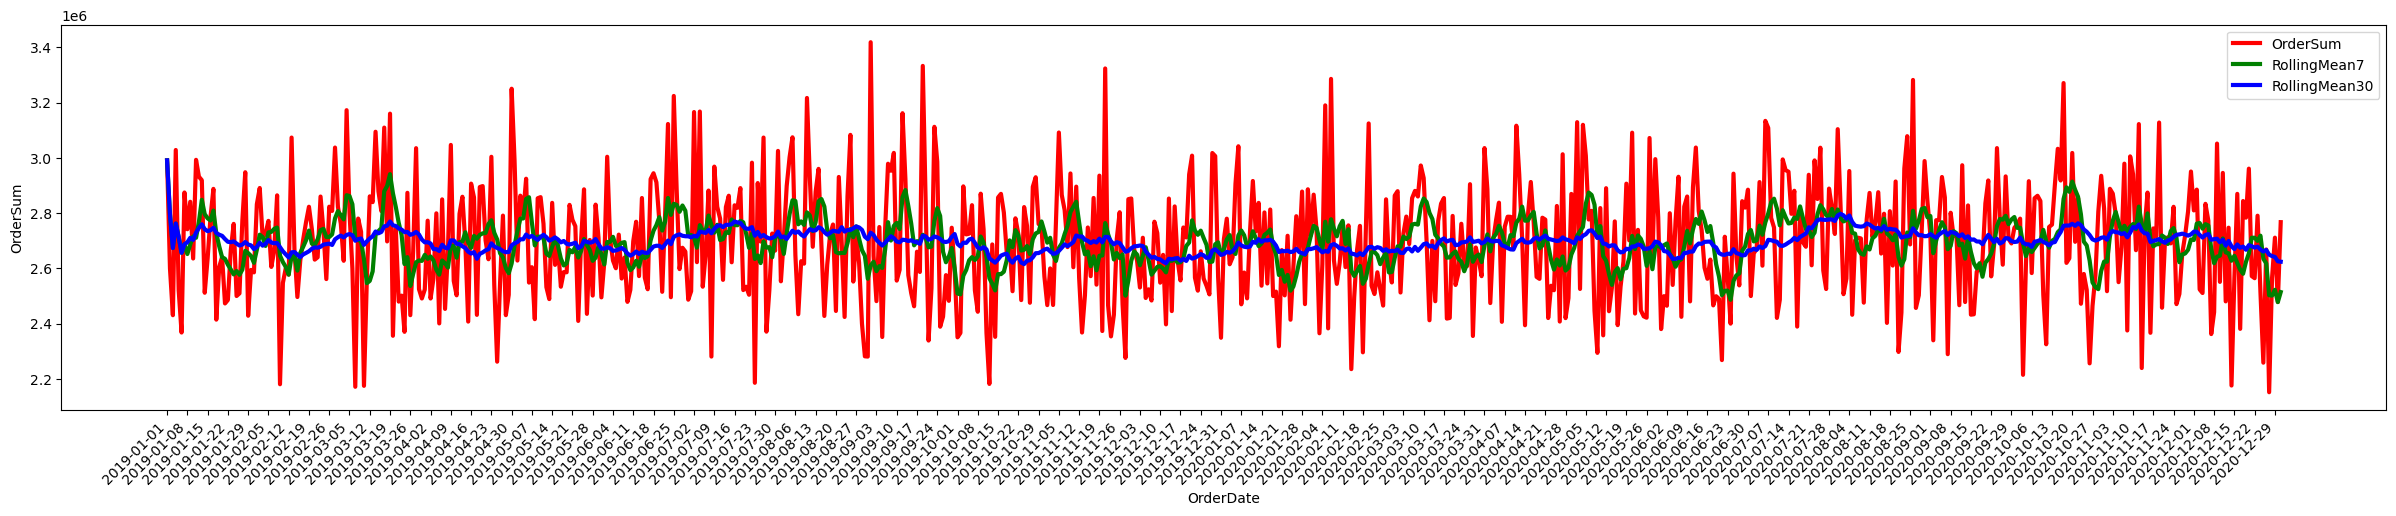

In [3]:
plt.figure(figsize=(30, 5))

freq = 7
ax = sns.lineplot(x = 'OrderDate', y = 'OrderSum', data=df2, color='r', lw=3, label='OrderSum')
xticks = ax.get_xticks();
ax.set_xticks(xticks[::freq]);
ax.set_xticklabels(df2.iloc[::freq]['OrderDate'], rotation=45, ha='right');

sns.lineplot(x = 'OrderDate', y = 'RollingMean7', data=df2, color='g', lw=3, label='RollingMean7');
sns.lineplot(x = 'OrderDate', y = 'RollingMean30', data=df2, color='b', lw=3, label='RollingMean30');

## 3. Construct a box chart for the distribution of the order amount according to year of the order
3.1 Add a hue parameter by customer's gender

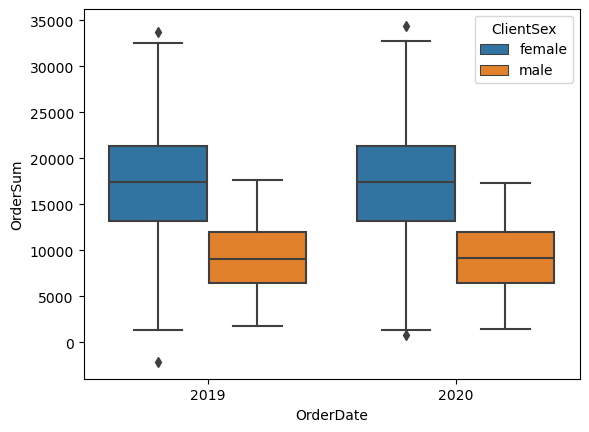

In [4]:
sns.boxplot(x = df['OrderDate'].dt.year, y = df['OrderSum'], hue = df['ClientSex']);

## 4. Create a histogram of the distribution of the order amount depending on the customer's gender
4.1 Change the colour of the histogram to bright red, add a dark grey fill in the chart area

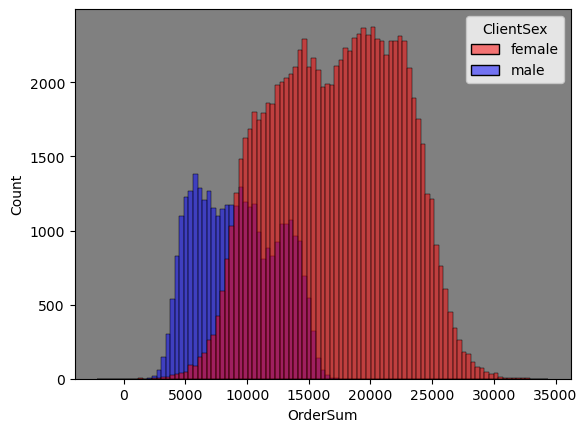

In [5]:
hist = sns.histplot(data=df, x='OrderSum', hue='ClientSex', palette={'male':'blue', 'female':'red'});
hist.set_facecolor('grey')

## 5. Create a bar graph as a function of the maximum amount of the order as a function of the date (month, no year)
5.1 Change orientation of the chart to horizontal bar chart

5.2. Add grouping of columns by gender

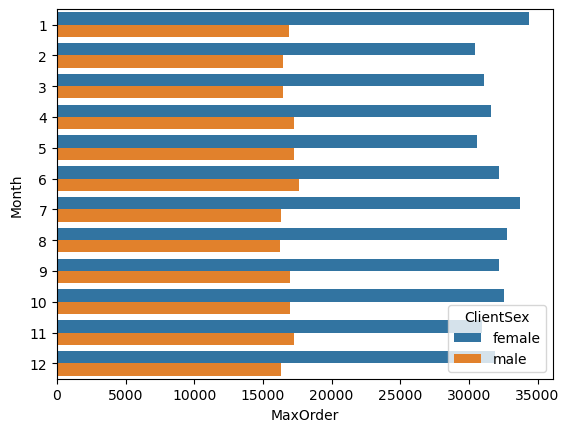

In [6]:
df['Month'] = df['OrderDate'].dt.strftime('%m').astype('int')
df5 = df.groupby(['Month', 'ClientSex'])['OrderSum'].max().reset_index()
df5.rename(columns={'OrderSum':'MaxOrder'}, inplace=True)
sns.barplot(data=df5, x='MaxOrder', y='Month', hue='ClientSex', orient='h');

## 6. Build a heat map of the table - average amount of the order by date (year-month) and sex of the client

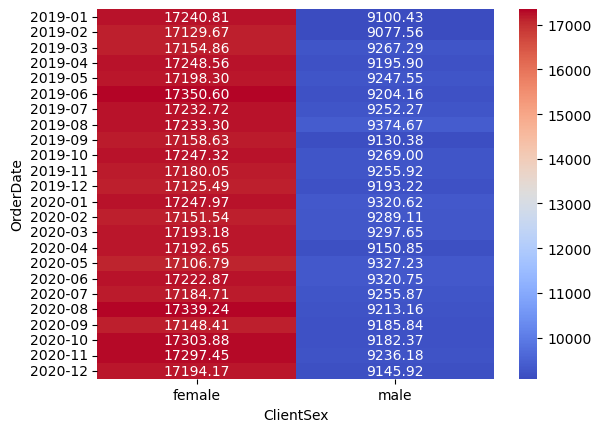

In [7]:
df6 = df.groupby([df['OrderDate'].dt.strftime('%Y-%m'), 'ClientSex'])['OrderSum'].mean().reset_index()
df6.rename(columns={'OrderSum':'AvgOrder'}, inplace=True)
sns.heatmap(data=df6.pivot('OrderDate', 'ClientSex', 'AvgOrder'), annot=True, fmt='.2f', cmap='coolwarm');

## 7. Build a categorical scatter diagram of the dependence of the order amount on the gender 
7.1. Change style of the chart

/var/folders/k0/pk1b16mx61j0c8lv8m_l5gl40000gn/T/ipykernel_20275/1822908802.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df, x='ClientSex', y='OrderSum', palette='coolwarm', kind="strip", jitter=0.2, size=5, aspect=2);


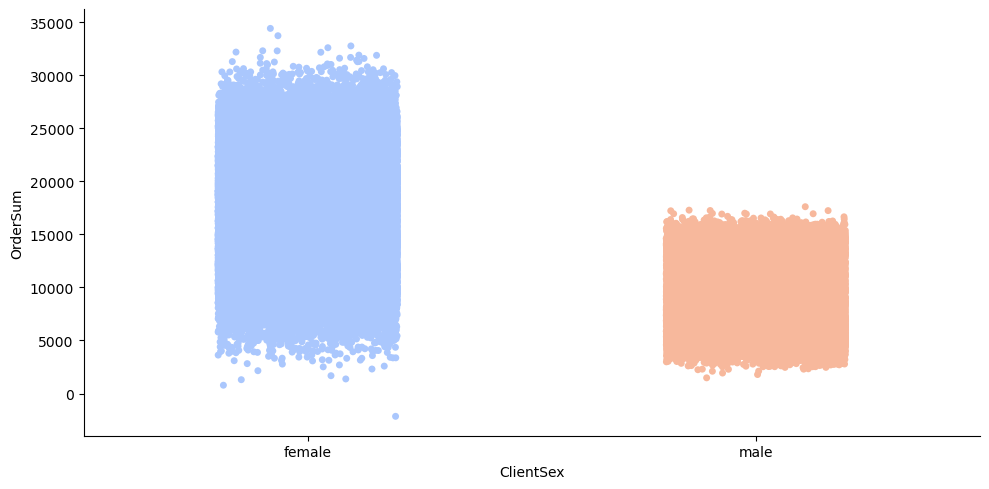

In [8]:
sns.catplot(data=df, x='ClientSex', y='OrderSum', palette='coolwarm', kind="strip", jitter=0.2, size=5, aspect=2);

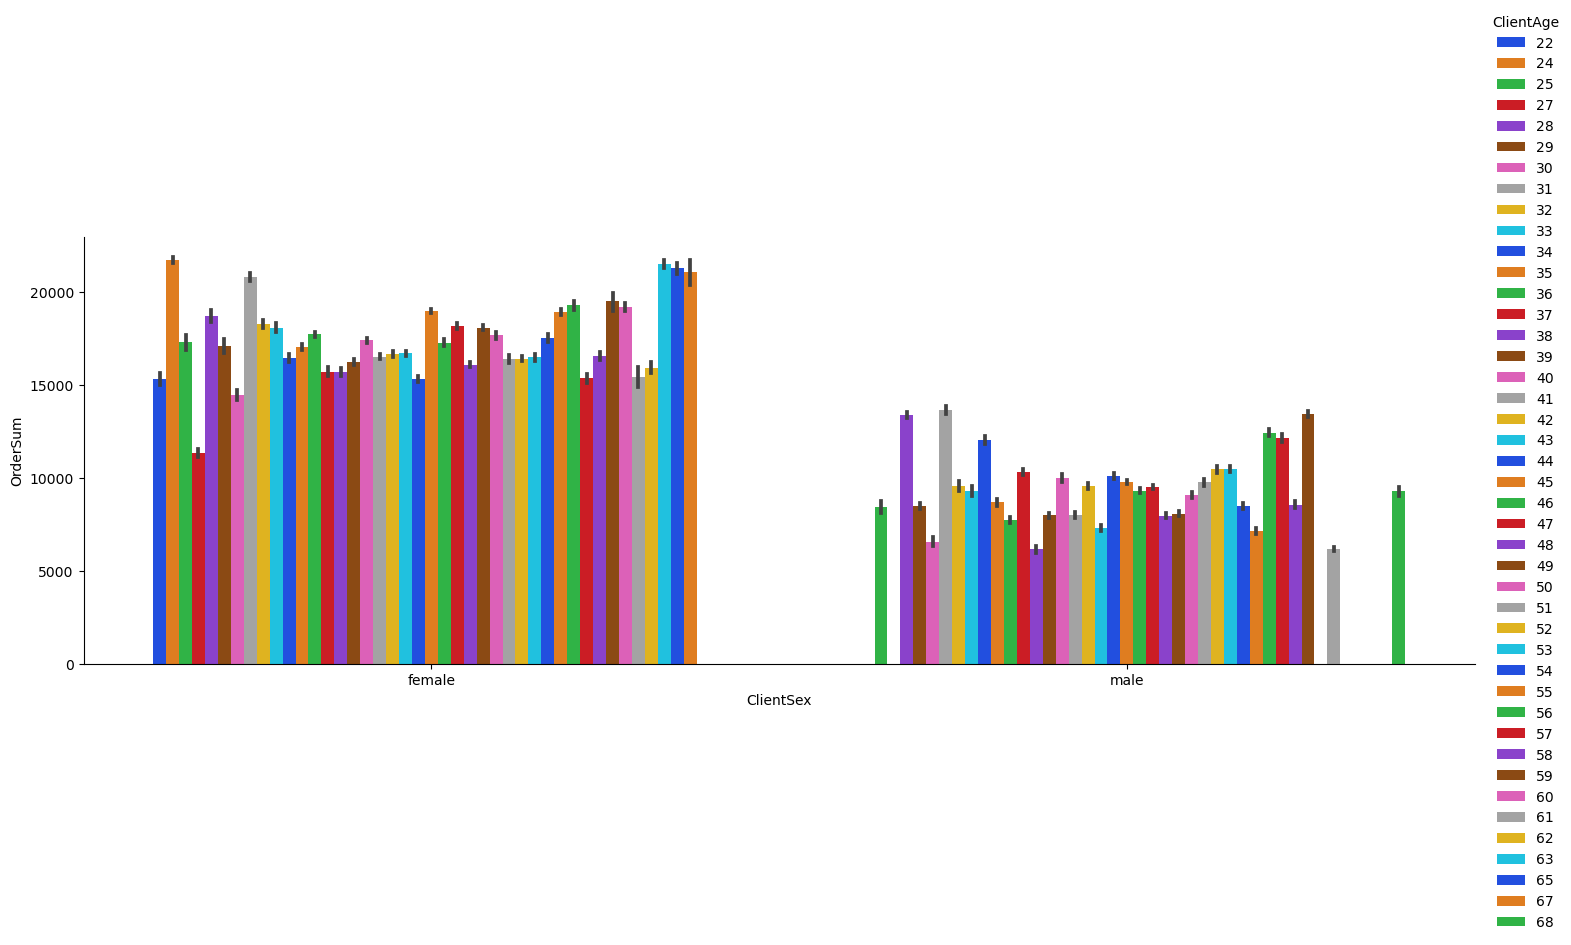

In [9]:
sns.catplot(data=df, x='ClientSex', y='OrderSum', hue="ClientAge", kind="bar", aspect=3, palette='bright');

## 8. Build a faceted chart, with histograms of order amount distribution, depending on the year of the order (columns) and the customer's gender (rows).
8.1 Replace the bar graphs with fiddle charts

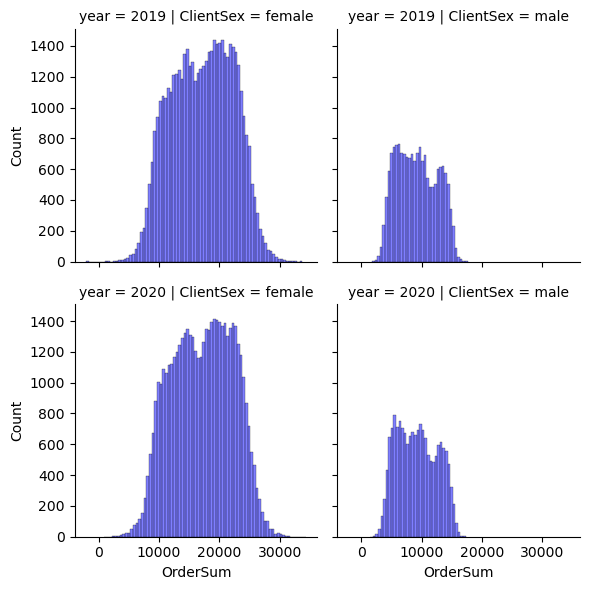

In [10]:
df['year'] = df['OrderDate'].dt.year
fg = sns.FacetGrid(data=df, col="ClientSex", row="year")
fg.map(sns.histplot, "OrderSum", color='blue', alpha=0.5);

## 9. Construct a joint graph of the dependence of the amount of orders of men and women, per day (at the edges of the graph should go histograms distribution of the amounts of orders) (pre need to create a table where the index - a day, and the two columns correspond to the amount of orders of men separately and women separately, for each day)

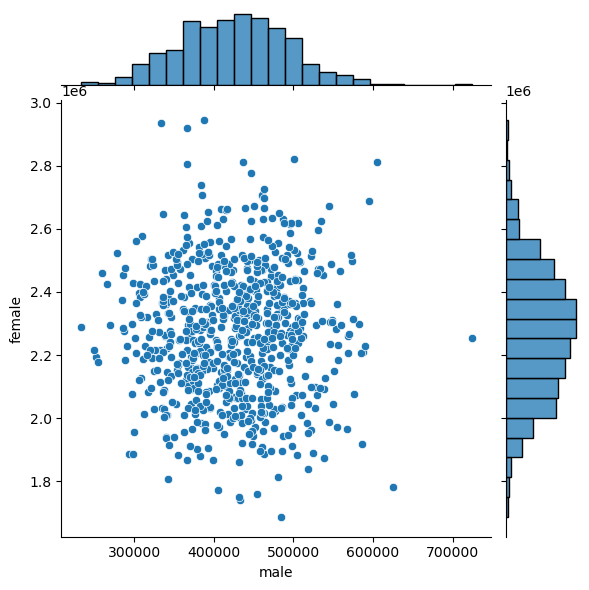

In [11]:
df9  = df.groupby(['OrderDate', 'ClientSex'])['OrderSum'].sum().reset_index()
df9 = df9.pivot('OrderDate', 'ClientSex', 'OrderSum')
sns.jointplot(data=df9, x='male', y='female');

## 10. Draw a two-dimensional density diagram of the distribution of the amounts of men's and women's orders per day
10.1 Build your colour palette and apply it to the graph

In [9]:
sns.choose_cubehelix_palette();

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

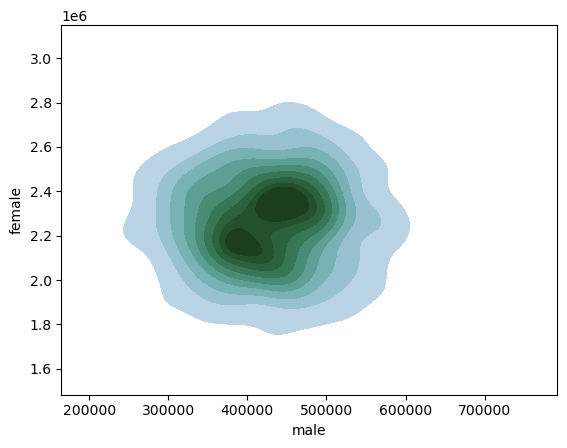

In [12]:
my_palette = sns.cubehelix_palette(n_colors=16, start=1.7, rot=0.4, dark=0.15, light=.85, reverse=False, gamma=1.0, hue=0.8, as_cmap=True)
sns.kdeplot(x = df9.male, y = df9.female, fill=True, cmap = my_palette);